In [241]:
from functions import *
from read_from_file_df import *
import pickle

In [242]:
def to_show(board,size):
    table = np.zeros((size, size, 3))
    for index, col in enumerate(board.columns):
        color = int(board[col]) * -1 + 1
        i = index // size
        j = index % size
        table[i, j] = [color, color, color]
    return table

In [243]:
AMOUNT_MOVES=50

In [244]:
READ_FILE = 2502
FILE_TO_READ = f"{SIZE}-{READ_FILE}-{AMOUNT_MOVES}boards.bnr"
PATH_TO_READ = str(READ_FILE % NUM_DICT) + "\\" + FILE_TO_READ
df = read_file_to_df(PATH_TO_READ, SIZE)

In [245]:
num_board = 5
board1 = df.iloc[num_board-1:num_board]
board2 = df.iloc[num_board:num_board+1]

C:\Users\dror\AppData\Local\Temp\ipykernel_22744\570581587.py:4: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  color = int(board[col]) * -1 + 1


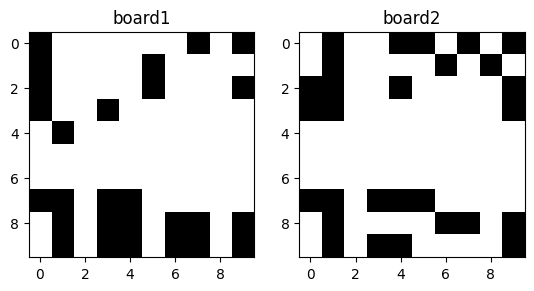

In [246]:
board1_to_show = to_show(board1,SIZE)
board2_to_show = to_show(board2,SIZE)
fig, axes = plt.subplots(1, 2)

# Plot the first image
axes[0].imshow(board1_to_show)
axes[0].set_title('board1')

# Plot the second image
axes[1].imshow(board2_to_show)
axes[1].set_title('board2')

# Show the images
plt.show()

In [247]:
new_columns = [f'Col_{i}' for i in range(1, LEN + 1)]
source = PATH_MODELS + "forward\\dt"
board1.columns = new_columns
res = pd.DataFrame()
for i in range(LEN): # to any pixel in the expected board
    name_file = f"{source}_pixel_{str(i+1)}.pkl"
    with open(name_file, 'rb') as file:
        loaded_model = pickle.load(file)
    pixel = loaded_model.predict(board1)
    res[i] = pixel

C:\Users\dror\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.1 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\dror\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.1 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:

C:\Users\dror\AppData\Local\Temp\ipykernel_22744\570581587.py:4: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  color = int(board[col]) * -1 + 1


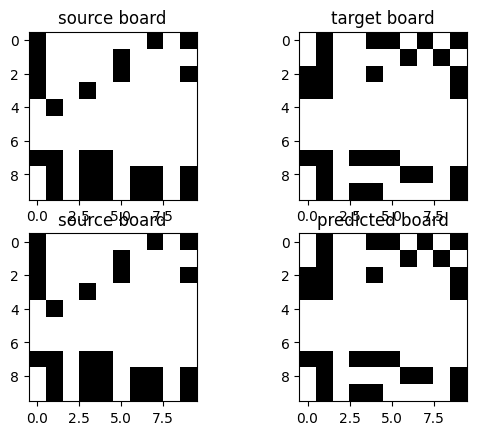

In [248]:
res_to_show = to_show(res,SIZE)
fig, axes = plt.subplots(2, 2)

axes[0, 0].imshow(board1_to_show)
axes[0, 0].set_title('source board')
axes[0, 1].imshow(board2_to_show)
axes[0, 1].set_title('target board')
axes[1, 0].imshow(board1_to_show)
axes[1, 0].set_title('source board')
axes[1, 1].imshow(res_to_show)
axes[1, 1].set_title('predicted board')

# Show the images
plt.show()

In [249]:
new_columns = [f'Col_{i}' for i in range(1, LEN + 1)]
board2.columns = new_columns
source = PATH_MODELS + "reverse1\\dt_r1"
res = pd.DataFrame()
for i in range(LEN): # to any pixel in the expected board
    name_file = f"{source}_pixel_{str(i+1)}.pkl"
    print(name_file)
    with open(name_file, 'rb') as file:
        loaded_model = pickle.load(file)
    pixel = loaded_model.predict(board2)
    res[i] = pixel

C:\Users\dror\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.1 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\dror\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.1 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:

C:\GameOfLifeFiles\models\reverse1\dt_r1_pixel_1.pkl
C:\GameOfLifeFiles\models\reverse1\dt_r1_pixel_2.pkl
C:\GameOfLifeFiles\models\reverse1\dt_r1_pixel_3.pkl
C:\GameOfLifeFiles\models\reverse1\dt_r1_pixel_4.pkl
C:\GameOfLifeFiles\models\reverse1\dt_r1_pixel_5.pkl
C:\GameOfLifeFiles\models\reverse1\dt_r1_pixel_6.pkl
C:\GameOfLifeFiles\models\reverse1\dt_r1_pixel_7.pkl
C:\GameOfLifeFiles\models\reverse1\dt_r1_pixel_8.pkl
C:\GameOfLifeFiles\models\reverse1\dt_r1_pixel_9.pkl
C:\GameOfLifeFiles\models\reverse1\dt_r1_pixel_10.pkl
C:\GameOfLifeFiles\models\reverse1\dt_r1_pixel_11.pkl
C:\GameOfLifeFiles\models\reverse1\dt_r1_pixel_12.pkl
C:\GameOfLifeFiles\models\reverse1\dt_r1_pixel_13.pkl
C:\GameOfLifeFiles\models\reverse1\dt_r1_pixel_14.pkl
C:\GameOfLifeFiles\models\reverse1\dt_r1_pixel_15.pkl
C:\GameOfLifeFiles\models\reverse1\dt_r1_pixel_16.pkl
C:\GameOfLifeFiles\models\reverse1\dt_r1_pixel_17.pkl
C:\GameOfLifeFiles\models\reverse1\dt_r1_pixel_18.pkl
C:\GameOfLifeFiles\models\reverse1\dt

C:\Users\dror\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.1 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\dror\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.1 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:

C:\Users\dror\AppData\Local\Temp\ipykernel_22744\570581587.py:4: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  color = int(board[col]) * -1 + 1


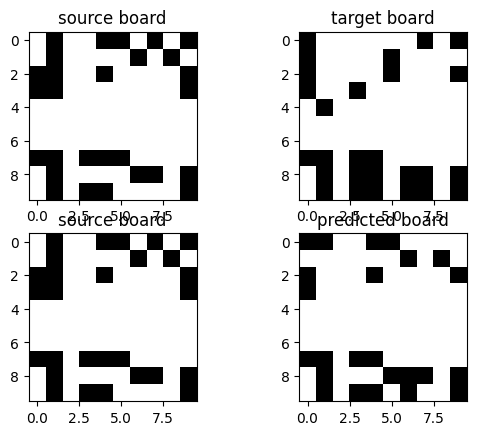

In [250]:
res_to_show = to_show(res,SIZE)
fig, axes = plt.subplots(2, 2)

axes[0, 0].imshow(board2_to_show)
axes[0, 0].set_title('source board')
axes[0, 1].imshow(board1_to_show)
axes[0, 1].set_title('target board')
axes[1, 0].imshow(board2_to_show)
axes[1, 0].set_title('source board')
axes[1, 1].imshow(res_to_show)
axes[1, 1].set_title('predicted board')

# Show the images
plt.show()

In [251]:

s = 0
for i in range(LEN):
    if res.iloc[0][i] == board1.iloc[0][i]:
        s+=1
print(s)

83


C:\Users\dror\AppData\Local\Temp\ipykernel_22744\3285619179.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if res.iloc[0][i] == board1.iloc[0][i]:
